# Exploratory Data Analysis (Personal Music Collection Metadata)

### Load The Metadata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

my_music_metadata_df = pd.read_csv("my_music_metadata.csv", index_col=0)
display(my_music_metadata_df)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
0,212,Over Overthinking You,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7438232,183457
1,214,Absolutely Final Goodbye,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6532311,160809
2,216,Make It Work,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9333659,230844
3,218,Get Yourself Together,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8606428,212662
4,220,With Love,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9618910,237975
...,...,...,...,...,...,...,...,...,...
874,1962,Anthems for a Seventeen Year Old Girl,Broken Social Scene,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8899716,275670
875,1964,Scott Pilgrim,Plumtree,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5889314,181968
876,1966,O Katrina!,Black Lips,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5532348,170840
877,1968,Sleazy Bed Track,The Bluetones,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8903857,275800


### Print Out Total File Size Storage And Total Time

In [2]:
total_bytes = my_music_metadata_df['Size'].sum()
total_milliseconds = my_music_metadata_df['Total Time'].sum()

print("Total Bytes: \t", total_bytes)
print("Total Seconds: \t", total_milliseconds)

Total Bytes: 	 6265166905
Total Seconds: 	 175916573


That is about 6.26 gigabytes of data, and its duration is about 2 days.

### Pie Chart For File Types In My Music Collection

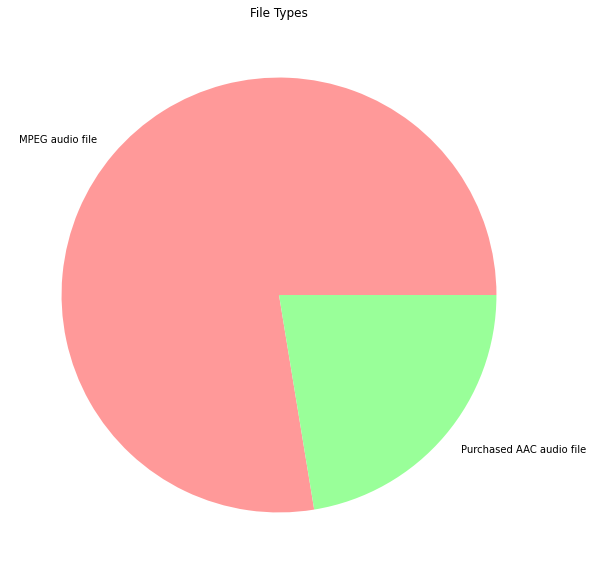

MPEG audio file             682
Purchased AAC audio file    197
Name: Kind, dtype: int64


In [3]:
file_type_counter = my_music_metadata_df['Kind'].value_counts()
file_type_counter.plot(
    kind='pie', 
    figsize=(15,10), 
    colors=['#ff9999','#99ff99'], 
    title='File Types', 
    ylabel=""
)
plt.show()
print(file_type_counter)

### Bar Chart For Music Genres In My Music Collection

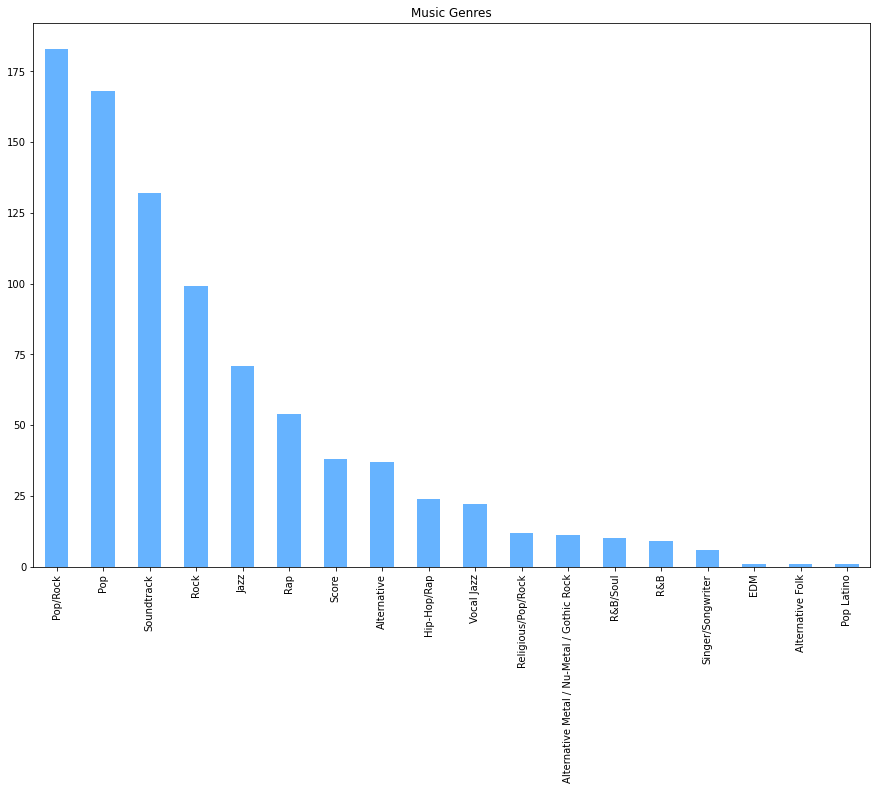

In [4]:
music_genre_counter = my_music_metadata_df['Genre'].value_counts()
music_genre_counter.plot(
    kind='bar', 
    figsize=(15,10), 
    color=['#66b3ff'], 
    title='Music Genres'
)
plt.show()

As you can see on the above bar graph, there are over 18 genres in my personal music collection. To simplify the machine learning process, we need to reclassify each of the songs into one of five genres:
 * Soundtrack
 * Hip Hop
 * Jazz
 * Pop
 * Rock

To do that, lets examine the songs that are do not belong in one of the five categories.

# Data Cleaning

Here is a list of helper methods that aid in the data cleaning process.

In [5]:
#filter tracks by genre
def filter_tracks_by_genre(genre):
    genre_conditional = my_music_metadata_df['Genre'] == genre
    songs_by_genre = my_music_metadata_df[genre_conditional]
    
    return songs_by_genre

#filter tracks by album name
def filter_tracks_by_album(album):
    album_conditional = my_music_metadata_df['Album'] == album
    songs_by_album = my_music_metadata_df[album_conditional]
    
    return songs_by_album

#Once filter tracks by genre, get me the list of albums
def get_albums_by_genre(genre):
    songs_by_genre = filter_tracks_by_genre(genre)
    album_list = list(songs_by_genre['Album'].unique())
    
    return album_list

#Once filter tracks by album, get me the list of artists
def get_artists_by_album(album):
    songs_by_genre = filter_tracks_by_album(album)
    artist_list = list(songs_by_genre['Artist'].unique())
    
    return artist_list

#Once filter tracks by genre, get me a list of albums along with their associated artists
def display_album_artist_by_genre(genre):
    albums = get_albums_by_genre(genre)
    print('List Of Albums Labeled As '+ genre +' Along With Associated Artists: ')
    for album in albums:
        print("**", album)
        artist_list = get_artists_by_album(album)
        for i, artist in enumerate(artist_list):
            print("  ", i + 1, "-", artist)

#Relabel all tracks in the album to its new genre
def relabel_album_genre(album, new_genre):
    album_conditional = my_music_metadata_df['Album'] == album
    my_music_metadata_df.loc[album_conditional, 'Genre'] = new_genre


## Pop Rock

In [6]:
tracks = filter_tracks_by_genre('Pop/Rock')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
397,1006,I Want It All,Queen,Absolute Greatest,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6568418,241371
201,614,Wake Me Up When September Ends,Green Day,American Idiot,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,11480438,285675
317,846,The (After) Life of the Party,Fall Out Boy,Infinity on High,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8117495,201816
371,954,Make Over,Christina Aguilera,Stripped,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,10165945,252656


In [7]:
display_album_artist_by_genre("Pop/Rock")

List Of Albums Labeled As Pop/Rock Along With Associated Artists: 
** Back to Basics 
   1 - Christina Aguilera
** American Idiot
   1 - Green Day
** ÷
   1 - Ed Sheeran
** Infinity on High
   1 - Fall Out Boy
   2 - Fall Out Boy & Butch Walker
** Death of a Bachelor
   1 - Panic! At the Disco
** Stripped
   1 - Christina Aguilera
   2 - Christina Aguilera & Lil' Kim
   3 - Christina Aguilera & Larry Gold
   4 - Christina Aguilera & Redman
** Songs About Jane
   1 - Maroon 5
** Absolute Greatest
   1 - Queen
   2 - Queen/David Bowie
   3 - Queen/National Philharmonic Orchestra
** Minutes to Midnight
   1 - Linkin Park
** Mezmerize
   1 - System of a Down
** Hypnotize
   1 - System of a Down
** Intertwined - EP
   1 - dodie
** Folie à Deux
   1 - Fall Out Boy


In [8]:
pop_albums = [
    'Back to Basics ', 
    '÷', 
    'Stripped', 
    'Intertwined - EP'
]

pop_rock_albums = get_albums_by_genre('Pop/Rock')
for album in pop_rock_albums:
    if album in pop_albums:
        relabel_album_genre(album, "Pop")
    else:
        relabel_album_genre(album, "Rock")

## Rap

In [9]:
tracks = filter_tracks_by_genre('Rap')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
820,1854,My Fault,Eminem,The Slim Shady LP,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9734496,241528
790,1794,When the Music Stops,Eminem/D12,The Eminem Show,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6499008,269035
825,1864,If I Had,Eminem,The Slim Shady LP,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9895411,245551
782,1778,My Dad's Gone Crazy,Eminem,The Eminem Show,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,2711870,266971


In [10]:
display_album_artist_by_genre("Rap")

List Of Albums Labeled As Rap Along With Associated Artists: 
** DAMN.
   1 - Kendrick Lamar
   2 - Kendrick Lamar/Rihanna
   3 - Kendrick Lamar/Zacari
   4 - Kendrick Lamar/U2
** The Eminem Show
   1 - Eminem/Obie Trice
   2 - Eminem
   3 - Eminem/Steve Berman
   4 - Eminem/Dina Rae
   5 - Eminem/Dr. Dre
   6 - Eminem/D12
   7 - Paul D. Rosenberg
** The Slim Shady LP
   1 - Eminem
   2 - Eminem/Royce da 5'9"
   3 - Eminem/Aristotle/Marky Bass
   4 - DJ Paul Bunyon
   5 - Eminem/Royce da 5'9"/Jeff Bass
   6 - Eminem/Jeff Bass/Marky Bass
   7 - Jeff Bass
   8 - Winkler/Zoe


In [11]:
relabel_album_genre("DAMN.", "Hip-Hop")
relabel_album_genre("The Eminem Show", "Hip-Hop")
relabel_album_genre("The Slim Shady LP", "Hip-Hop")

## Score

In [12]:
tracks = filter_tracks_by_genre('Score')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
738,1690,Training With Mr. Schaibel,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7918604,184320
746,1706,Beth's Story,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5652172,127660
750,1714,Ohio US Championship 1967,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,4579090,100832
754,1722,The Final Game,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,18292309,443663


In [13]:
display_album_artist_by_genre("Score")

List Of Albums Labeled As Score Along With Associated Artists: 
** The Queen's Gambit (Music from the Netflix Limited Series)
   1 - Carlos Rafael Rivera


In [14]:
relabel_album_genre("The Queen's Gambit (Music from the Netflix Limited Series)", "Soundtrack")

## Alternative

In [15]:
tracks = filter_tracks_by_genre('Alternative')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
623,1460,bad guy,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7881905,194142
646,1506,8,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7047020,173270
803,1820,We Are Broken,Paramore,Riot! (Deluxe Version),Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9360872,218488
796,1806,Fences,Paramore,Riot! (Deluxe Version),Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8586590,199131


In [16]:
display_album_artist_by_genre("Alternative")

List Of Albums Labeled As Alternative Along With Associated Artists: 
** Pray For the Wicked
   1 - Panic! At the Disco
** Pray For The Wicked
   1 - Panic! At the Disco
** WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?
   1 - Billie Eilish
** Riot! (Deluxe Version)
   1 - Paramore


In [17]:
relabel_album_genre("Pray For the Wicked", "Rock")
relabel_album_genre("Pray For The Wicked", "Rock")
relabel_album_genre("WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?", "Pop")
relabel_album_genre("Riot! (Deluxe Version)", "Rock")

## Hip-Hop / Rap

In [18]:
tracks = filter_tracks_by_genre('Hip-Hop/Rap')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
280,772,Role Model,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7307510,205280
281,774,Kill You,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,9294100,264786
279,770,Dead Wrong,Eminem & The Notorious B.I.G.,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,10359482,297440
276,764,Just Lose It,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,8687738,248600


In [19]:
display_album_artist_by_genre("Hip-Hop/Rap")

List Of Albums Labeled As Hip-Hop/Rap Along With Associated Artists: 
** Curtain Call - The Hits (Deluxe Version)
   1 - Eminem
   2 - Eminem & Dido
   3 - Eminem & Dr. Dre
   4 - Eminem & Elton John
   5 - Eminem & The Notorious B.I.G.
   6 - Eminem & D12
   7 - Eminem & JAY Z


In [20]:
relabel_album_genre("Curtain Call - The Hits (Deluxe Version)", "Hip-Hop")

## Vocal Jazz

In [21]:
tracks = filter_tracks_by_genre("Vocal Jazz")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
304,820,All My Tomorrows,Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,11362203,275026
291,794,The Good Life (With Count Basie and His Orches...,Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6062917,147400
292,796,The Girl from Ipanema (With Antonio Carlos Jobim),Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7784010,194040
293,798,Fly Me to the Moon (In Other Words),Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6106737,147520


In [22]:
display_album_artist_by_genre("Vocal Jazz")

List Of Albums Labeled As Vocal Jazz Along With Associated Artists: 
** Nothing But the Best - The Frank Sinatra Collection (Remastered)
   1 - Frank Sinatra


In [23]:
relabel_album_genre("Nothing But the Best - The Frank Sinatra Collection (Remastered)", "Jazz")

## Religious / Pop / Rock

In [24]:
tracks = filter_tracks_by_genre('Religious/Pop/Rock')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
500,1212,I Could Be the One,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8757214,218122
494,1200,Bounce Back,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7279570,181185
492,1196,Stuck,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8898263,221648
498,1208,Hesitation,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7816698,194612


In [25]:
display_album_artist_by_genre("Religious/Pop/Rock")

List Of Albums Labeled As Religious/Pop/Rock Along With Associated Artists: 
** Stacie Orrico
   1 - Stacie Orrico


In [26]:
relabel_album_genre("Stacie Orrico", "Pop")

## Alternative Metal / Nu-Metal / Gothic Rock

In [27]:
tracks = filter_tracks_by_genre("Alternative Metal / Nu-Metal / Gothic Rock")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
848,1910,My Last Breath,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,10090977,247431
840,1894,Tourniquet,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,11318727,278125
850,1914,Going Under,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8796345,215066
849,1912,Whisper,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,13298807,327627


In [28]:
display_album_artist_by_genre("Alternative Metal / Nu-Metal / Gothic Rock")

List Of Albums Labeled As Alternative Metal / Nu-Metal / Gothic Rock Along With Associated Artists: 
** Fallen
   1 - Evanescence


In [29]:
relabel_album_genre("Fallen", "Rock")

## R & B / Soul

In [30]:
tracks = filter_tracks_by_genre("R&B/Soul")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
330,872,Rotate,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6530737,180845
326,864,Perfect,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7776213,215849
324,860,Bump,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7219593,202057
331,874,Every Night,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7401781,206733


In [31]:
display_album_artist_by_genre("R&B/Soul")

List Of Albums Labeled As R&B/Soul Along With Associated Artists: 
** Trip
   1 - Jake Barker & Blended Babies


In [32]:
relabel_album_genre("Trip", "Hip-Hop")

## R & B 

In [33]:
tracks = filter_tracks_by_genre("R&B")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
220,652,Chunky,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6035265,187010
219,650,24K Magic,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6994468,226951
226,664,Finesse,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6257754,191033
223,658,Versace on the Floor,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7963481,261276


In [34]:
display_album_artist_by_genre("R&B")

List Of Albums Labeled As R&B Along With Associated Artists: 
** 24K Magic
   1 - Bruno Mars


In [35]:
relabel_album_genre("24K Magic", "Hip-Hop")

## Singer / Songwriter

In [36]:
tracks = filter_tracks_by_genre("Singer/Songwriter")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
561,1336,6/10,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6474218,185487
562,1338,Instrumental,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,2197111,50340
566,1346,Secret For the Mad,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6959323,197278
564,1342,Would You Be So Kind,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6528377,180952


In [37]:
display_album_artist_by_genre("Singer/Songwriter")

List Of Albums Labeled As Singer/Songwriter Along With Associated Artists: 
** You - EP
   1 - dodie


In [38]:
relabel_album_genre("You - EP", "Pop")

## Alternative Folk

In [39]:
tracks = filter_tracks_by_genre("Alternative Folk")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
621,1456,Here Comes The Sun (feat. dodie),Jacob Collier,Here Comes The Sun (feat. dodie) - Single,Alternative Folk,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,9766618,238360


In [40]:
display_album_artist_by_genre("Alternative Folk")

List Of Albums Labeled As Alternative Folk Along With Associated Artists: 
** Here Comes The Sun (feat. dodie) - Single
   1 - Jacob Collier


In [41]:
relabel_album_genre("Here Comes The Sun (feat. dodie) - Single", "Jazz")

## Pop Latino

In [42]:
tracks = filter_tracks_by_genre("Pop Latino")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
392,996,Despacito (feat. Daddy Yankee),Luis Fonsi,Despacito (feat. Daddy Yankee) - Single,Pop Latino,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,8604342,227791


In [43]:
display_album_artist_by_genre("Pop Latino")

List Of Albums Labeled As Pop Latino Along With Associated Artists: 
** Despacito (feat. Daddy Yankee) - Single
   1 - Luis Fonsi


In [44]:
relabel_album_genre("Despacito (feat. Daddy Yankee) - Single", "Pop")

## EDM

In [45]:
tracks = filter_tracks_by_genre("EDM")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
464,1140,Stay With Me,Diamond Eyes & Christina Grimmie,Stay With Me - Single,EDM,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7370843,243800


There is only one track that has the genre 'EDM' so to make things simple, let us relabel it as "Pop".

In [46]:
display_album_artist_by_genre("EDM")

List Of Albums Labeled As EDM Along With Associated Artists: 
** Stay With Me - Single
   1 - Diamond Eyes & Christina Grimmie


In [47]:
relabel_album_genre("Stay With Me - Single", "Pop")

# Genre Distribution (Post - Reclassification)

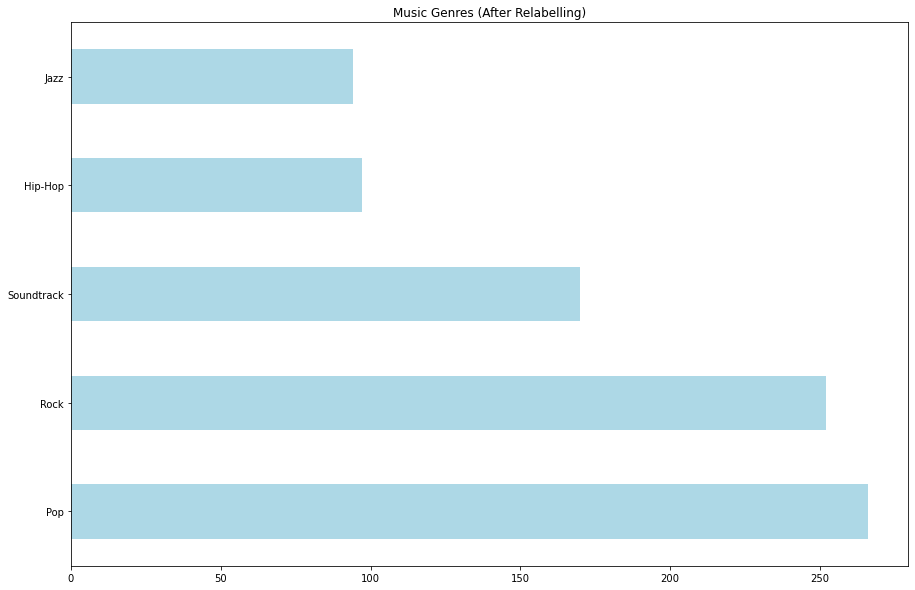

Pop           266
Rock          252
Soundtrack    170
Hip-Hop        97
Jazz           94
Name: Genre, dtype: int64

In [48]:
music_genre_counter = my_music_metadata_df['Genre'].value_counts()
music_genre_counter.plot(
    kind='barh', 
    figsize=(15,10), 
    color='lightblue', 
    title='Music Genres (After Relabelling)'
)
plt.show()
my_music_metadata_df.Genre.value_counts()